[Link for description of dataset](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)<br>
[Research paper](http://users.fs.cvut.cz/ivo.bukovsky/PROJEKT/Data/Realna/BIO/EEG/reference/PRE61907.pdf)<br>
[Kaggle](https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition)

Electroencephalography (EEG) is an electrophysiological monitoring method to record electrical activity of the brain.

### Short description of dataset

|Data Set Characteristics||Attribute Characteristics||Associated Tasks||Number of Instances||Number of Attributes||Missing Values?|
|---||---||---||---||---||---|
|Multivariate, Time-Series||Integer, Real||Classification, Clustering||11500||179||N/A|



### Plan
    - Change the y target column (make a binary classification task)
    - Remove Unnamed: 0 column (additionaly check the importance of it)
    - EDA + Smart visualisation of data
    - Make pipelines for all the approaches for binary classification task + make a comperison table of results
    ----------------
    - PCA or ICA (from mne) --> reduce size of data
    - Use previous pipelines for reduced data + make a comperison table of results
    - Model tuning???
    

### Imports

In [2]:
import pandas as pd
import mne
import sklearn
import scipy
import matplotlib as plt
import requests
import bs4
import pydicom

In [3]:
#Read data directly from web application (additionally we can download data locally)
#Further we will dowload additional data (extended option for training)

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv')

In [4]:
#Let us have a quick look on a data

In [5]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [6]:
#We observe weird names of features (we have 180 different features).
#Let us look throught description of features and target (y) feature also.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.<br>
So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}. 


In [17]:
11500 / 500

23.0

In [18]:
#So, we have in total 11500 records(rows).
#Each 23(1 chunk) rows represent record for 1 second.(It means if we would like to plot data for second, we need 23 rows for that).

#We can calculate how much seconds(minutes) we have in our data.
#For that we need: 11500(all rows) / 23(1 chunk(1 second)) = 500 (seconds)(500 / 60 = 8.3 minutes)
#We got 500 seconds. We can check correctness: 500 * 23 = 11500 records(rows)

#As well, we know, that in one row we have 

In [19]:
# #!conda install -c conda-forge mne --yes
# from mne.datasets import sample

# #sample
# data_path = sample.data_path()
# data_path

# raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

# raw = mne.io.Raw(raw_fname, preload=False)
# print(raw)

# print(raw.ch_names[:10])

In [20]:
data.query('X1 > X2')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11489,X7.V1.51,90,83,69,41,31,40,58,75,82,...,83,77,52,19,-20,-33,-18,9,30,5
11490,X14.V1.404,-22,-64,-121,-201,-292,-336,-398,-527,-773,...,183,-152,-499,-577,-415,-223,-88,-18,-61,1
11492,X13.V1.624,-27,-53,-84,-104,-131,-171,-199,-203,-177,...,-127,-114,-99,-79,-56,-28,-14,-8,-12,1
11493,X23.V1.714,-136,-137,-138,-135,-130,-123,-116,-118,-119,...,-1,3,5,8,13,16,24,34,42,2


Each row represents just 1 second(not current person. It is just part of recordings). 
23 row represents full pictured recording (4096 data points = 178 (number of dimensions) * 23 seconds (rows)) --> and we can observe recordings of EEG for one person. 

In our case we have 500 individual persons. (500 records. But they are shuffled, so cann't find initial structure. 
It means we can use our data just the following way: 1 row - 1 second - 1 prediction)

Regarding y column (target column) we have descriptions: 

y contains the category of the 178-dimensional input vector. 
Specifically y in {1, 2, 3, 4, 5}: 
 - 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open 

 - 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed 

 - 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area 

 - 2 - They recorder the EEG from the area where the tumor was located 

 - 1 - Recording of seizure activity 

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

In [21]:
#Balanced
data.y.value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

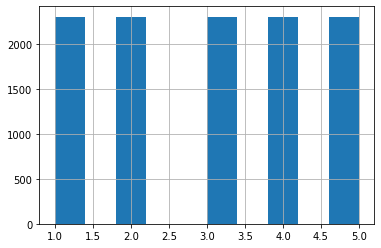

In [23]:
data.y.hist();

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(data.values[i][1:-1]) for i in range(len(data))];

In [ ]:
data.values

In [ ]:
len(data)

In [ ]:
data.info()

In [ ]:
data.describe()